### What flipping a coin twenty billion times can tell us about the gambler's fallacy.
Wrapping your head around the fact that the outcome of previous coin flips do not influence future ones is not easy.  
The probability of a coin flip resulting in tails is exactly 0.5, yet the probability of x consecutive coin flips resulting in tails is 0.5^x. Of course assuming that x is an integer, - by each consecutive flip with equal outcome the probability decreases by an additional power.  
  
*Is it fair to guess that the next flip will result in heads after x consecutive tails, already knowing that context does not matter in any way when the coin is not biased?*

In [1]:
import random as r
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

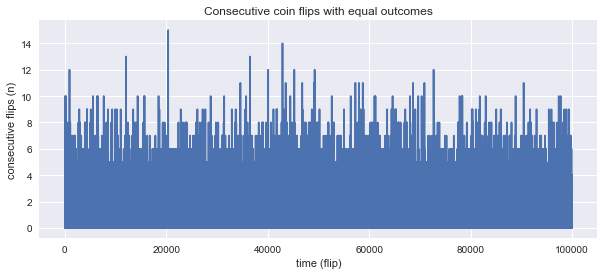

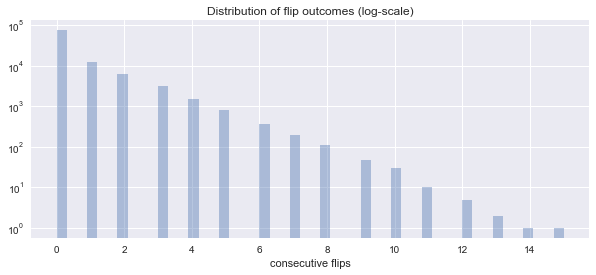

In [2]:
def generate_flips(n_flips):
    
    # Defining variables for easier reading
    heads = 0
    tails = 1
    
    # Assigned bias to coin. 
    # Negative values skews probability in favor of tails
    bias = 0.0
    
    # Init flip results timeseries
    results = []

    # Generate n_flip outcomes
    for n in range(n_flips):
        if r.uniform(0, 1) >= 0.5 + bias:
            results.append(tails)
        else:
            results.append(heads)

    # Generate array storing n consecutive flips
    results_context = [0]*len(results)
    results_context_max = [0]*len(results)
    consecutive_flips = 0
    for i in range(1, len(results)):
        if results[i-1] == results[i]:
            consecutive_flips += 1
        else:
            results_context_max[i] = consecutive_flips
            consecutive_flips = 0
        results_context[i] = consecutive_flips
    
    return results_context, results_context_max

# Number of times the coin is flipped
n_flips = 100000

# Create lists of flip results and consecutive equal flip counter
results_context, results_context_max = generate_flips(n_flips)

# Plot coin flip results
fig = plt.figure(figsize=(10, 4))
plot = fig.add_subplot(111)
plot.plot(results_context_max)
plt.title('Consecutive coin flips with equal outcomes')
plot.set_ylabel('consecutive flips (n)')
plot.set_xlabel('time (flip)')
plt.show()

# Plot log distribution of coin flip results
fig = plt.figure(figsize=(10, 4))
plt.title('Distribution of flip outcomes (log-scale)')
fig.add_subplot(111).set_xlabel('consecutive flips')
sns.distplot(results_context_max, kde=False).set_yscale('log')
plt.show()

After flipping a hundred thousand coins, it is apparent that getting n consecutive tails gets exponentially harder as n increases. Now consider the following experiment:  
  
*If someone correctly predicts the outcome of the next coin flip, they receive \$10. If their prediction fails, they have to pay \$10.*  
  
Because the coin is not biased, simply betting blindly on, let's say, heads, will result in approximately 0 profit. What if the bettor reverse their bet after a given n consecutive flips of equal outcomes?

In [3]:
# Simulate betting
def simulate_bet(results_context, reverser, stake):
    equity = []
    equity.append(0)
    for i in range(1, len(results_context)):
        if results_context[i-1] >= reverser:
            if results_context[i] >= reverser:
                equity.append(equity[-1] - stake)
            else:
                equity.append(equity[-1] + stake)
    return equity

Let's simulate someone reversing their bet after 3 consecutive equal flips.

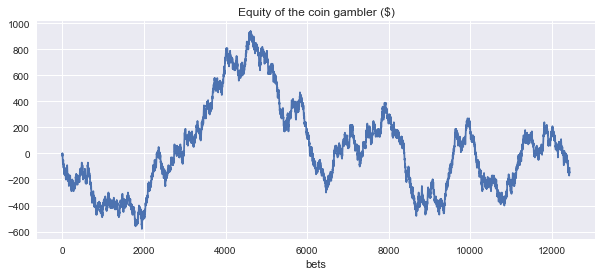

Final gain/loss: $-110


In [ ]:
fig = plt.figure(figsize=(10, 4))
plot = fig.add_subplot(111)
equity = simulate_bet(results_context, 3, 10)
plot.plot(equity)
plt.title('Equity of the coin gambler ($)')
plot.set_xlabel('bets')
plt.show()
print('Final gain/loss: $%.0f' % equity[-1])

That doesn't look too good for our gamblers prospects. Surely this must be just bad luck!  
Running the strategy with different parameters and flip results might tell us more about how it will perform over ~~a ridiculous number of~~ ***18 000 000 000*** flips.  

In [ ]:
# Init plot
fig = plt.figure(figsize=(15, 5))
plot = fig.add_subplot(111)

# Results storing array
final_equities_sum = [0]*20

# Flip 1000000 coins 1000 different times
for i in range(1000):
    
    # Flip the coin 1000000 times
    results = generate_flips(1000000)[0]
    
    # Test reversing the bets with values from 2 to 19
    for reverser in range(2, 20):
        equity = simulate_bet(results, reverser, 10)
        final_equities_sum[reverser] += equity[-1]
        plot.plot(equity)
        
plt.title('All outcomes ($)')
plot.set_xlabel('bets')
plt.show()

# Get average of gains for every reversal value
average_final_equities = [final_equities_sum[reverser]/18000 for reverser in range(2, 20)]
fig = plt.figure()
plot = fig.add_subplot(111)
plot.set_xlabel('Reversal value')
plt.title('Average gain ($)')
# Plot with 2-index
my_xticks = range(2, 20)
x = range(0, 18)
plt.xticks(x, my_xticks)
# Plot averages
plot.plot(x, average_final_equities)
plt.show()

Sadly, after flipping the coin twenty billion times, it's fair to say that our gambler has no edge in their betting strategy.